<a href="https://colab.research.google.com/github/nagrotte/MachineLearning/blob/main/AIML_ML_Project_personal_loan_campaign_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [57]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

## Loading the dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Data Overview

In [11]:

# Read the CSV file directly from the URL
df = pd.read_csv("Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


* Observations
* Sanity checks

In [12]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [13]:
num_rows, num_cols = df.shape
print ("number of rows:", num_rows)
print ("number of columns:", num_cols)

number of rows: 5000
number of columns: 14


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

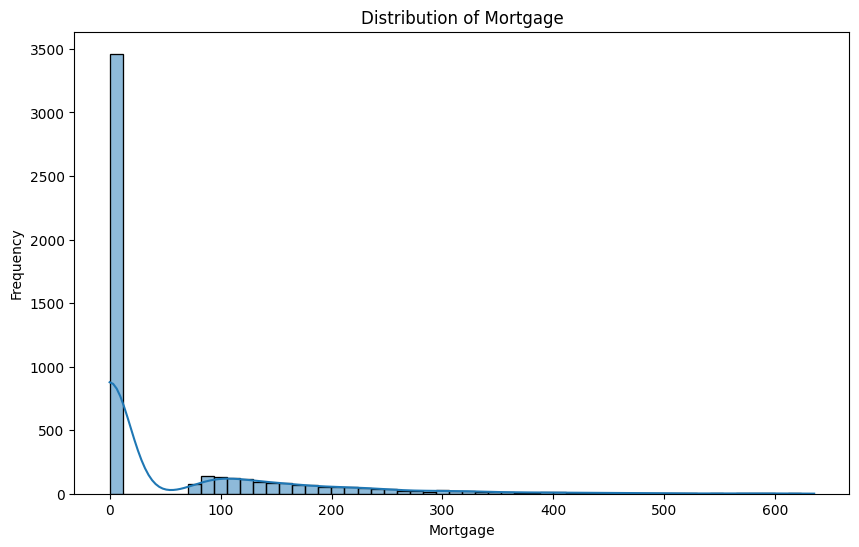

In [14]:
# 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
plt.figure(figsize=(10, 6))
sns.histplot(df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.show()

In [15]:
# 2. How many customers have credit cards?
credit_card_count = df['CreditCard'].sum()
print("Number of customers with credit cards:", credit_card_count)



Number of customers with credit cards: 1470


In [16]:
# 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
correlation_matrix = df.corr()
personal_loan_correlation = correlation_matrix['Personal_Loan'].sort_values(ascending=False)
print("Correlation with Personal Loan:\n", personal_loan_correlation)

Correlation with Personal Loan:
 Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


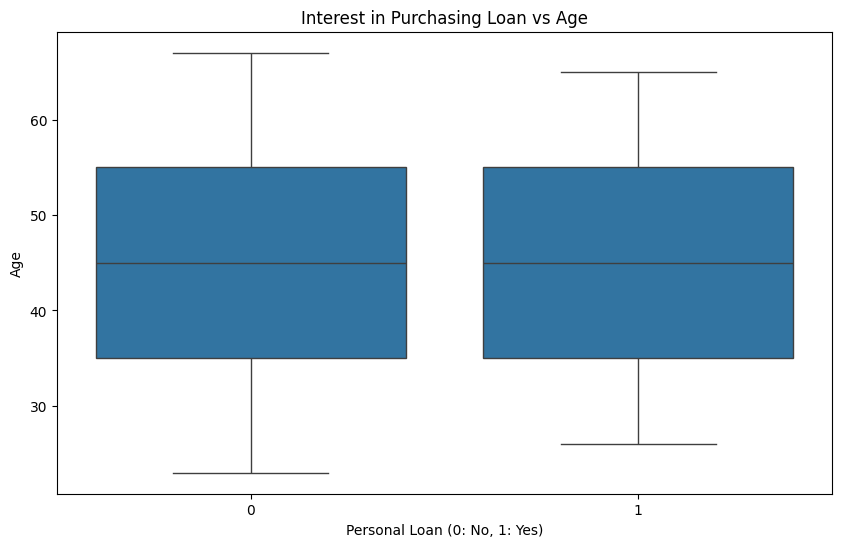

In [17]:
# 4. How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title('Interest in Purchasing Loan vs Age')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

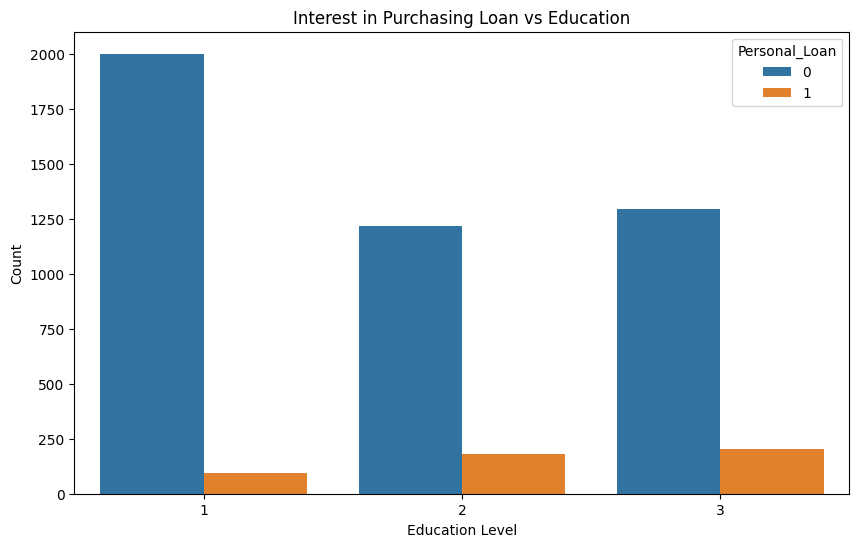

In [18]:
# 5. How does a customer's interest in purchasing a loan vary with their education?
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=df)
plt.title('Interest in Purchasing Loan vs Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Missing value treatment
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Experience']] = imputer.fit_transform(df[['Age', 'Experience']])
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25.0,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45.0,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39.0,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35.0,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35.0,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


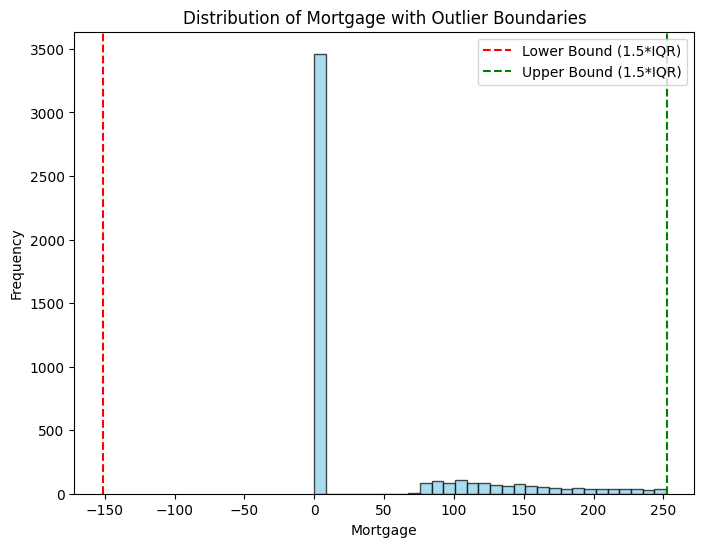

In [20]:
# Outlier detection and treatment (if needed)
# For example, we can remove outliers in 'Mortgage' column using IQR method
Q1 = df['Mortgage'].quantile(0.25)
Q3 = df['Mortgage'].quantile(0.75)
IQR = Q3 - Q1
data = df[~((df['Mortgage'] < (Q1 - 1.5 * IQR)) | (df['Mortgage'] > (Q3 + 1.5 * IQR)))]

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot the distribution of 'Mortgage' column
plt.figure(figsize=(8, 6))
plt.hist(data['Mortgage'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (1.5*IQR)')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound (1.5*IQR)')
plt.title('Distribution of Mortgage with Outlier Boundaries')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

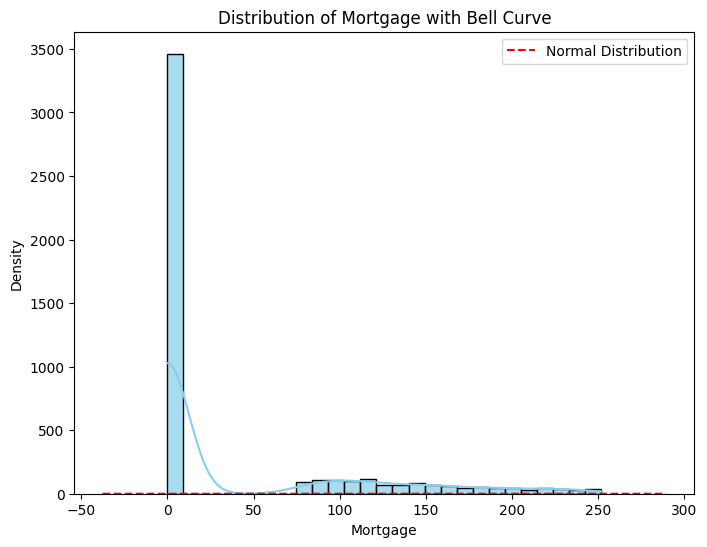

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Plot the distribution of 'Mortgage' column as a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['Mortgage'], kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Plot the normal distribution curve
sns.kdeplot(data['Mortgage'], color='red', linestyle='--', label='Normal Distribution')
plt.title('Distribution of Mortgage with Bell Curve')
plt.xlabel('Mortgage')
plt.ylabel('Density')
plt.legend()
plt.show()


In [22]:
# Preparing data for modeling
# Splitting data into features and target variable
X = df.drop(['Personal_Loan', 'ID','ZIPCode'], axis=1)  # Features
y = df['Personal_Loan']  # Target variable
df.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25.0,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45.0,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39.0,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35.0,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35.0,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Preprocessing steps using pipelines
numeric_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [27]:
categorical_features = ['Education']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [29]:
# Full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_processed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_processed = pipeline.transform(X_test)

## Model Building

Building 2 models here  - Decision Tree Classifier, Random Forest Classifier and  evaluate the perfromance parameters - then compare both models.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Define and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_processed, y_train)

# Predict the target variable on the test set
y_pred = clf.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1-score:", f1)
print("Decision Tree ROC-AUC Score:", roc_auc)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.991
Precision: 0.9528301886792453
Recall: 0.9619047619047619
F1-score: 0.957345971563981
ROC-AUC Score: 0.9781590848629955
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       895
           1       0.95      0.96      0.96       105

    accuracy                           0.99      1000
   macro avg       0.97      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
 [[890   5]
 [  4 101]]


### Model Evaluation Criterion

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("############## DECISSION TREEE CLASSIFIER EVALUATION CRITERIA##########")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



print("############## RANDOM FOREST EVALUATION CRITERIA##########")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

############## DECISSION TREEE CLASSIFIER EVALUATION CRITERIA##########
Accuracy: 0.991
Precision: 0.9528301886792453
Recall: 0.9619047619047619
F1-score: 0.957345971563981
ROC-AUC Score: 0.9781590848629955
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       895
           1       0.95      0.96      0.96       105

    accuracy                           0.99      1000
   macro avg       0.97      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
 [[890   5]
 [  4 101]]
############## RANDOM FOREST EVALUATION CRITERIA##########
Random Forest Accuracy: 0.992
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.98      0.94      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
w

*


### Model Building

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the preprocessed training data
rf_classifier.fit(X_train_processed, y_train)

# Predict the target variable on the test set
y_pred_rf = rf_classifier.predict(X_test_processed)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.992
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.98      0.94      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
 [[893   2]
 [  6  99]]


### Model Performance Improvement

In [49]:

'''
NOT WORKING - IDEA ONLY
performs hyperparameter tuning for both a Decision Tree Classifier and a Random Forest Classifier using GridSearchCV.
It searches for the best combination of hyperparameters within specified ranges. Then,
it sets these best parameters in the pipelines and trains the classifiers with the best parameters.
Finally, it evaluates the models and prints their accuracies.
NOTE: RandoForest Classifier is  taking too long
'''

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a pipeline with preprocessing and the classifier
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Define hyperparameters to tune
param_grid_dt = {
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_processed, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_

# Set the best parameters in the pipeline
pipeline_dt.set_params(**best_params_dt)

# Train the Decision Tree classifier with the best parameters
clf_dt_best = pipeline_dt.fit(X_train_processed, y_train)

# Evaluate the model
y_pred_dt_best = clf_dt_best.predict(X_test_processed)
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
print("Best Decision Tree Accuracy:", accuracy_dt_best)

# Repeat the same process for Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

param_grid_rf = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_processed, y_train)

best_params_rf = grid_search_rf.best_params_

# Set the best parameters in the pipeline
pipeline_rf.set_params(**best_params_rf)

# Train the Random Forest classifier with the best parameters
clf_rf_best = pipeline_rf.fit(X_train_processed, y_train)

# Evaluate the model
y_pred_rf_best = clf_rf_best.predict(X_test_processed)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print("Best Random Forest Accuracy:", accuracy_rf_best)


Best Decision Tree Accuracy: 0.992


KeyboardInterrupt: 

## Model Comparison and Final Model Selection

In [50]:
# Compare the models
print("\nModel Comparison:")
if accuracy_rf > accuracy:
    print("Random Forest Classifier is better.")
elif accuracy_rf < accuracy:
    print("Decision Tree Classifier is better.")
else:
    print("Both models have the same accuracy.")


Model Comparison:
Random Forest Classifier is better.


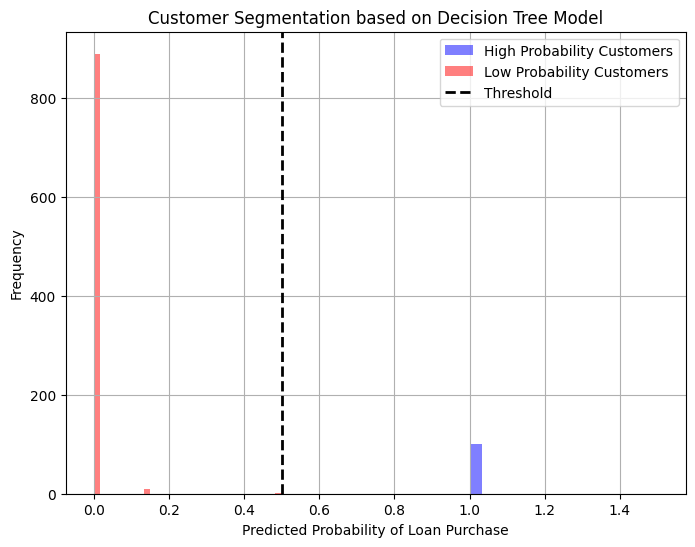

In [60]:
# trained models clf_dt_best and clf_rf_best and have X_test_processed as the processed test data

# Predict probabilities for loan purchase using Decision Tree model
probabilities_dt = clf_dt_best.predict_proba(X_test_processed)[:, 1]

# Predict probabilities for loan purchase using Random Forest model
#probabilities_rf = clf_rf_best.predict_proba(X_test_processed)[:, 1]

# Choose a threshold probability
threshold = 0.5  # Example threshold, can be adjusted based on business needs

# Segment customers based on predicted probabilities
high_probability_customers_dt = X_test_processed[probabilities_dt > threshold]
low_probability_customers_dt = X_test_processed[probabilities_dt <= threshold]

#high_probability_customers_rf = X_test_processed[probabilities_rf > threshold]
#low_probability_customers_rf = X_test_processed[probabilities_rf <= threshold]

# Perform analysis and further actions based on the segmented customer groups...

import matplotlib.pyplot as plt

# Choose a threshold probability
threshold = 0.5  # Example threshold, can be adjusted based on business needs

# Segment customers based on predicted probabilities
high_probability_customers_dt = probabilities_dt[probabilities_dt > threshold]
low_probability_customers_dt = probabilities_dt[probabilities_dt <= threshold]

# Plot the segmentation
plt.figure(figsize=(8, 6))
plt.hist(high_probability_customers_dt, bins=30, color='blue', alpha=0.5, label='High Probability Customers')
plt.hist(low_probability_customers_dt, bins=30, color='red', alpha=0.5, label='Low Probability Customers')
plt.axvline(x=threshold, color='black', linestyle='--', linewidth=2, label='Threshold')
plt.xlabel('Predicted Probability of Loan Purchase')
plt.ylabel('Frequency')
plt.title('Customer Segmentation based on Decision Tree Model')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

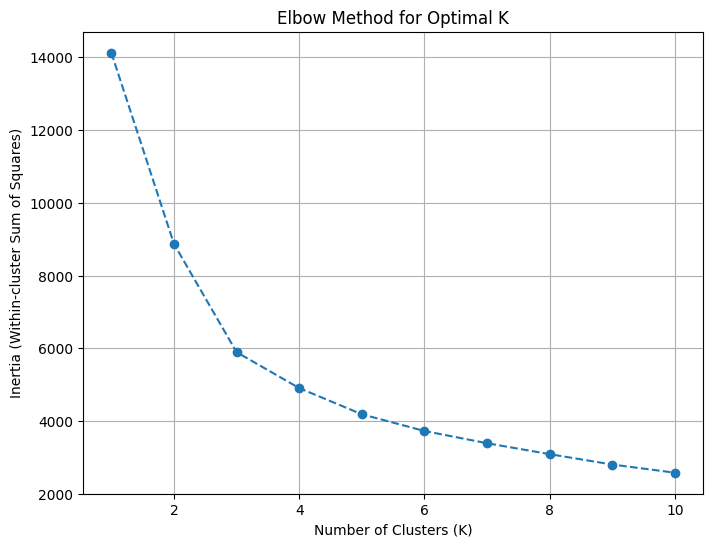

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Length of values (4709) does not match length of index (5000)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select relevant features for clustering (e.g., Age, Income, CCAvg, etc.)
# Adjust the feature columns based on your dataset
selected_features = ['Age', 'Income', 'CCAvg']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[selected_features])

# Determine the optimal number of clusters (K) using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Based on the Elbow curve, choose the optimal K (e.g., 3 or 4)
optimal_k = 3

# Build the K-Means model with the chosen K
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(data_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans_model.labels_

# Explore the clusters (e.g., check mean values for each cluster)
cluster_summary = data.groupby('Cluster')[selected_features].mean()
print(cluster_summary)


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Customer Segmentation:**


*    Use the trained models to segment customers based on their predicted probability of purchasing a loan.

**Campaign Targeting:**



*  Tailor marketing campaigns to target the segments of customers identified as more likely to purchase a loan.
Develop personalized offers, incentives, or messaging to appeal to the needs and preferences of these segments.


___